### Student Information
Name:崔敏慧

Student ID:108065516

GitHub ID:tsumin99

Kaggle name:崔敏慧Tsuei, Min-Hui

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.PNG)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

# First Part：Take home exercises

### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
# Import Libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import nltk

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
# Use the CountVectorizer to count the frequencies
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text)
# term frequency count in training dataset
train_fre = train_counts.toarray().sum(axis=0)



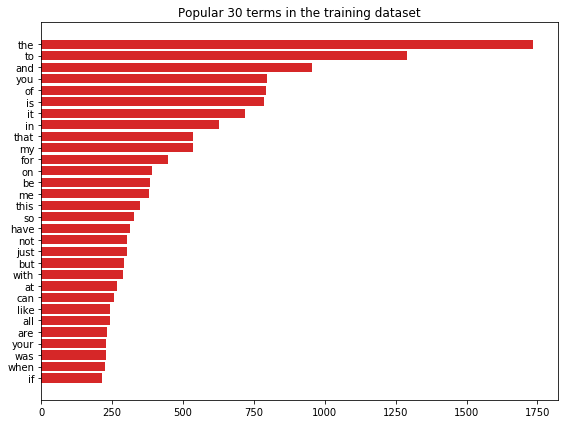

In [7]:
# plot the top 30 term with most appearance in training dataset.

N = 30
index = np.arange(N)

train_30term = []
for i in np.argsort(train_fre)[::-1][:N]:
    train_30term.append(count_vect.get_feature_names()[i])
y = np.sort(train_fre)[::-1][:N]

fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

ax.set_title('Popular 30 terms in the training dataset')
ax.barh(index, y, align='center', color='tab:red')
ax.set_yticks(index)
ax.set_yticklabels(train_30term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

In [8]:
# Use the CountVectorizer to count the frequencies
count_vect2 = CountVectorizer()
test_counts = count_vect2.fit_transform(test_df.text)
# term frequency count in testing dataset
test_fre = test_counts.toarray().sum(axis=0)

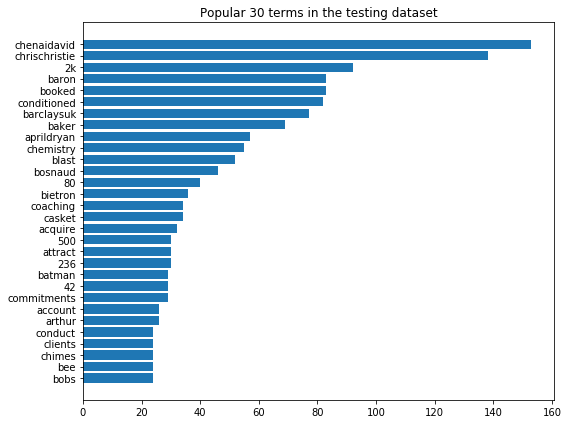

In [9]:
# plot the top 30 term with most appearance in testing dataset.

N = 30
index = np.arange(N)

test_30term = []
for i in np.argsort(test_fre)[::-1][:N]:
    test_30term.append(count_vect.get_feature_names()[i])
y = np.sort(test_fre)[::-1][:N]

fig = plt.figure(figsize=(8, 6))
ax = fig.subplots()

ax.set_title('Popular 30 terms in the testing dataset')
ax.barh(index, y, align='center', color='tab:blue')
ax.set_yticks(index)
ax.set_yticklabels(test_30term)
ax.invert_yaxis()

fig.tight_layout()
plt.show()

### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
# build analyzers (bag-of-words)
tfidf_vect = TfidfVectorizer()
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
tfidf_vect.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_tfidf_features = tfidf_vect.transform(train_df['text'])
# observe some feature names
feature_names = tfidf_vect.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

In [11]:
# build analyzers (bag-of-words)
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

feature_names_1000 = tfidf_1000.get_feature_names()
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?
![Imgur](pics/pic1.png)

Since the X-axis means "True label" and Y-axis represents "Predicted label", we could see how the true label and the predicted label overlapped and the accuracy of the analysis between them. 
.

Discoveries：

.
-> The number of matched labels has the following trend: Fear > Anger > Joy > Sadness, we could see that "Fear" got the highest performance in matching labels, however, "Fear & Sadness" have most unstable results with other three emotion tags. We could also see from the rate of accurate matching, "Joy" performs the best.
.

-> For the unmatched labels and interpret from the "True label" side, we could see that "Anger" is more liely to be wrongly matched with "Fear"(vice versa), and "Joy" would be liely mistook as the same amount for the remaining three emotion tags, and "Sadness" would be liely mistook as "Fear". 
.

->For the unmatched labels and interpret from the "Predicted label" side, we could see that the prediction liely mistook "Anger" as "Fear", and the "Fear" it predicted were 16 times as "Sadness" and 15 times as "Anger", the "Joy" was actually wrongly predicted 13 times as the "Fear", and so on. 
.

->This is quite interesting cause these emotions were quite distincitve, we could expect that people use sarcasm, dark humor or white lies' as strategy to illustrate things, so that We could see that these intersects of the emotions would be easily misclassified.  
***

In [12]:
from sklearn.tree import DecisionTreeClassifier
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW_500.fit(train_df['text'])
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [13]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'joy', 'fear', 'anger', 'sadness', 'sadness',
       'sadness', 'joy', 'fear'], dtype=object)

In [14]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.64


In [15]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

   micro avg       0.64      0.64      0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [16]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 16  9  4]
 [15 70  9 16]
 [ 5 13 54  7]
 [ 9 14  9 42]]


In [17]:
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

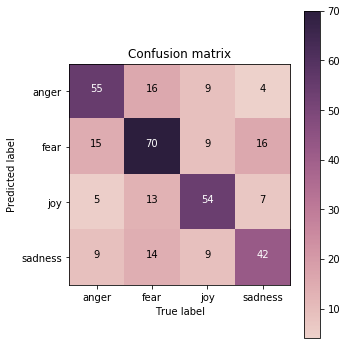

In [18]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [19]:
from sklearn.naive_bayes import MultinomialNB
# for a classificaiton problem, you need to provide both training & testing data
import nltk
BOW_vectorizer = CountVectorizer() 
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [20]:
## build MultinomialNB model
mnb_model = MultinomialNB()

## training!
mnb_model = mnb_model.fit(X_train, y_train)

## predict!
y_train_pred = mnb_model.predict(X_train)
y_test_pred = mnb_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'anger', 'joy', 'fear', 'joy', 'sadness', 'sadness',
       'sadness', 'joy', 'anger'], dtype='<U7')

In [21]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.79
testing accuracy: 0.72


In [22]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

   micro avg       0.72      0.72      0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [23]:
# Funciton for visualizing confusion_matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [24]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

NBcm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(NBcm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


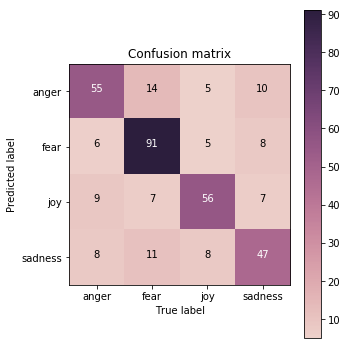

In [25]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(NBcm, classes=my_tags, title='Confusion matrix')

### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Discovery 1.  By Confusion matrix : Comparing the Naive Bayes and Decision tree model, we could see that the Naive Bayes Model actually performed better than Decision tree, since we could see that the confusion matrix is more balanced and the amount of misunderstanding "Fear" label is less.
.

Discovery 2.  By Accuracy : We could see that from the result of Accuracy, the Naive Bayes model has "much less over-fitting problem" than the Decision tree model, and the accuracy corresponds with each other better.
.

Discovery 3.  By f1-score : We could see from f1-score that by Naive Bayes Model the performance of f1-score are much better for all four emotional categories and for average data.
.

Explaination 1. -> Since the Decision Tree model works with both classification and regression problems, it's both easy for dealing with categorial and continuous data, also, we just need the data at the first place without too much design. However, the Decision Tree model got overfitting problem since it tends to ignore the relation between the datasets, and it's easier to get too much parameter to cause the over'fitting problem. We could solve this problem by doing tree pruning and change the pruning procedures, or by Random Forest model.
.

Explanation 2. -> By Naive Bayes model, it is not affected by the curse of dimensionality and large feature sets,, since this time our datasets are relatively diverse, so by this model we got a better performance compared to the Decision Tree model.
.

Explanation 3. -> By dealing with the over-fitting problem of the Decision Tree model, maybe we could try the "Regularization" or "Dropout" method to enhance the performance.

### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?


In [28]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [29]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1161       fear
3480    sadness
445       anger
2574        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [30]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [31]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

In [32]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 188us/step - loss: 1.3321 - accuracy: 0.3504 - val_loss: 1.2893 - val_accuracy: 0.4092
Epoch 2/25
3613/3613 [==============================] - 0s 87us/step - loss: 1.0013 - accuracy: 0.6402 - val_loss: 0.9029 - val_accuracy: 0.6801
Epoch 3/25
3613/3613 [==============================] - 0s 91us/step - loss: 0.5790 - accuracy: 0.7966 - val_loss: 0.7697 - val_accuracy: 0.7118
Epoch 4/25
3613/3613 [==============================] - 0s 88us/step - loss: 0.4154 - accuracy: 0.8467 - val_loss: 0.7562 - val_accuracy: 0.7032
Epoch 5/25
3613/3613 [==============================] - 0s 86us/step - loss: 0.3293 - accuracy: 0.8826 - val_loss: 0.7747 - val_accuracy: 0.6974
Epoch 6/25
3613/3613 [==============================] - 0s 91us/step - loss: 0.2642 - accuracy: 0.9076 - val_loss: 0.8295 - val_accuracy: 0.7061
Epoch 7/25
3613/3613 [==============================] - 0s 88us/step - loss: 0.21

In [33]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.58870706e-05, 9.98990357e-01, 8.59491047e-06, 9.45201435e-04],
       [9.66767073e-01, 2.15745941e-02, 1.69871928e-09, 1.16583444e-02],
       [5.89498195e-05, 1.40427155e-05, 9.99799669e-01, 1.27360268e-04],
       [2.73178443e-06, 9.99928355e-01, 6.17427140e-05, 7.10068571e-06],
       [9.62689340e-01, 2.80678715e-03, 7.55286237e-05, 3.44283693e-02]],
      dtype=float32)

In [34]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'anger', 'joy', 'fear', 'anger'], dtype=object)

In [35]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [36]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.350401,1.332134,0.409222,1.289253
1,1,0.640188,1.001347,0.680115,0.902941
2,2,0.796568,0.579014,0.711816,0.769744
3,3,0.846665,0.415357,0.703170,0.756198
4,4,0.882646,0.329292,0.697406,0.774735
5,5,0.907556,0.264233,0.706052,0.829456
6,6,0.925547,0.218601,0.691643,0.889627
7,7,0.942153,0.179017,0.682997,0.964771
8,8,0.951287,0.147764,0.685879,0.973577
9,9,0.960421,0.133017,0.671470,1.081445


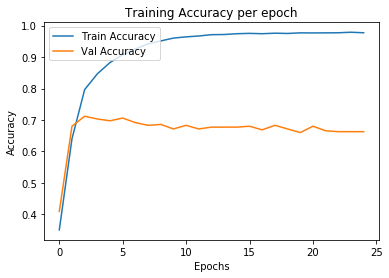

In [37]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()

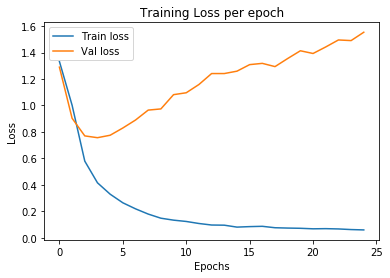

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss per epoch')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train loss', 'Val loss'], loc='upper left')
plt.show()

The "Training Accuracy per epoch" is facing the overfitting problem, meaning that it's having high variance and low bias. It may be affected by having too many parameters. We could use the method of regularization or by dropout to solve the overfitting problem. Also, we could also try to increase training data and reduce the model complexity.  
.

The "Training Loss per epoch" is facing the underfitting problem, which is having high bias and low variance. It might be the consequence of having too little model complexity, not having enough number of features, or containing noise. We could solve this problem by dealing with the problems mentioned above, by increasing the number of epochs or increase the time of training , or by using more data and also reducing the features by feature selection to have better results.

### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


By having the word vectors, we can combine all the word vectors together to represent the sentence data.

### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [40]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1161,20304,@twinfjournal @TwinningLife111 @KCtwinflame @T...,"[@, twinfjournal, @, TwinningLife111, @, KCtwi..."
3480,40653,Let's get drunk and tell each other things we'...,"[Let, 's, get, drunk, and, tell, each, other, ..."
445,10445,@trendykittykat Some people would rather hang ...,"[@, trendykittykat, Some, people, would, rathe..."
2574,30570,every time a new Anthony Weiner revelation bre...,"[every, time, a, new, Anthony, Weiner, revelat..."
3077,40250,How can you blame the manager watching these p...,"[How, can, you, blame, the, manager, watching,..."


In [41]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'twinfjournal', '@', 'TwinningLife111', '@', 'KCtwinflame', '@', 'TFUnion1111', '@', 'Para_Priestess', '@', 'cupidpoetry', 'I', 'went', 'thru', 'the', 'same', 'thing', 'yesterday', '#', 'panic', 'better2day']),
       list(['Let', "'s", 'get', 'drunk', 'and', 'tell', 'each', 'other', 'things', 'we', "'re", 'afraid', 'to', 'say', 'when', 'we', "'re", 'sober', '.']),
       list(['@', 'trendykittykat', 'Some', 'people', 'would', 'rather', 'hang', 'on', 'to', 'their', 'indignant', 'anger', '.', '*weary', 'sigh*'])],
      dtype=object)

In [42]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1161,20304,@twinfjournal @TwinningLife111 @KCtwinflame @T...,"[@, twinfjournal, @, TwinningLife111, @, KCtwi..."
3480,40653,Let's get drunk and tell each other things we'...,"[Let, 's, get, drunk, and, tell, each, other, ..."
445,10445,@trendykittykat Some people would rather hang ...,"[@, trendykittykat, Some, people, would, rathe..."
2574,30570,every time a new Anthony Weiner revelation bre...,"[every, time, a, new, Anthony, Weiner, revelat..."
3077,40250,How can you blame the manager watching these p...,"[How, can, you, blame, the, manager, watching,..."


In [43]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [44]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in word2vec_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in word2vec_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in word2vec_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in word2vec_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'ukedchat', 'free', 'blessed', 'Be', 'forever', 'help', '👌', 'plz', 'cant', 'November', 'bday', 'griffin', 'O', 'right', 'smile']
angry_words:  ['angry', 'travel', 'sober', 'win', 'surprised', 'Please', 'questions', 'Jimmy', 'won', 'students', 'Cause', 'cry', 'They', 'already', 'help', 'comments']
sad_words:  ['sad', 'later', 'funny', 'results', 'hilarious', 'cats', 'joke', 'Looks', 'shocking', 'panic', 'missedoutonsummerbikinibodybutwintersunbodywilldo', 'Late', 'cry', 'editing', 'awful', 'Who']
fear_words:  ['fear', 'living', 'thoughts', 'bestrong', 'photos', 'promise', 'Choose', 'happiness', 'GBBO', 'soup', 'violence', 'restoration', 'threat', 'charger', 'failure', 'release']

target words: 
['happy', 'ukedchat', 'free', 'blessed', 'Be', 'forever', 'help', '👌', 'plz', 'cant', 'November', 'bday', 'griffin', 'O', 'right', 'smile', 'angry', 'travel', 'sober', 'win', 'surprised', 'Please', 'questions', 'Jimmy', 'won', 'students', 'Cause', 'cry', 'They', 'already'

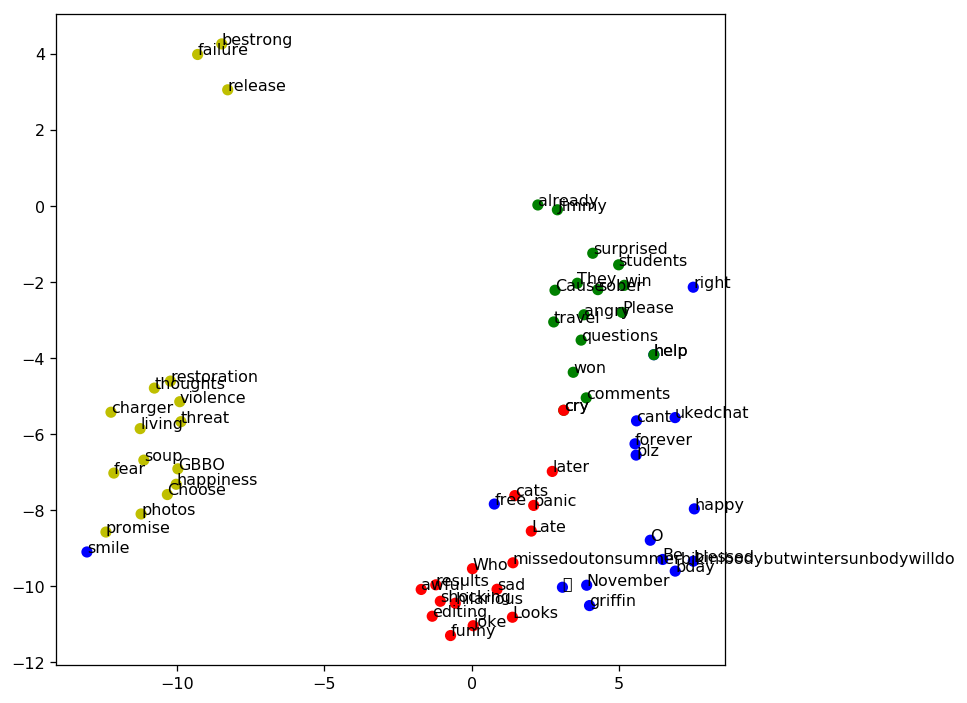

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = word2vec_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.wv.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 3: Kaggle Competition - Twitter Analysis

The fotllowing contents are:
    1. Data Loading and Preprocessing
    2. Feature engineering
    3. Model Training
    4. Results Generation and Evaluation

### 1. Data Loading and Preprocessing

Before beggining the competition, please make sure to download the [Twitter Dataset](https://www.kaggle.com/c/dm2020-hw2-nthu/data?select=tweets_DM.json)
Start loading the **csv** and **json** files into a single pandas dataframe.

In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import nltk
import kashgari
from kashgari.tasks.labeling import BiLSTM_CRF_Model
from kashgari.embeddings import BertEmbedding


In [5]:
# Load data from csv files and set up the column names
data_id = pd.read_csv("data_identification.csv",
                         sep=",", header=None, names=["id", "identification"])
emotion = pd.read_csv("emotion.csv",
                         sep=",", header=None, names=["id", "emotion"])
# Delete [0] row of the columns
data_id = data_id.drop([0])
emotion = emotion.drop([0])


In [6]:
# Merge data_id & emotion
merge = pd.merge(emotion, data_id ,on = 'id', how = 'outer') # include training and testing
merge

,id,emotion,identification
0,0x3140b1,sadness,train
1,0x368b73,disgust,train
2,0x296183,anticipation,train
3,0x2bd6e1,joy,train
4,0x2ee1dd,anticipation,train
...,...,...,...
1867530,0x2c4dc2,NaN,test
1867531,0x31be7c,NaN,test
1867532,0x1ca58e,NaN,test
1867533,0x35c8ba,NaN,test


In [7]:
# According to identification, seperate datas into train_data & test_data by query.
train_data = merge.query("identification == 'train'")
test_data = merge.query("identification == 'test'")

# To rerange index from 0
test_data.index = range(len(test_data))


**We need to do sth. for letting JSON file to combine with csv files.**

In [8]:
# Read data from json file and converted them into list.
json_list = list()
with open('tweets_DM.json' , 'r') as file:
    for line in file:
        json_list.append(json.loads(line))

In [9]:
# Insert tweet_id, hashtags, and text into dataframe 'text_df'
tweet_list = list()
for json in json_list:
    ids = json['_source']['tweet']['tweet_id']
    hashtags = json['_source']['tweet']['hashtags']
    text = json['_source']['tweet']['text']
    tweet_list.append([ids, hashtags, text])
text_df = pd.DataFrame(tweet_list, columns=['id', 'hashtag', 'text'])
text_df

,id,hashtag,text
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,[],I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,[],"Ah, corporate life, where you can date <LH> us..."


### 2. Feature Engineering

**In the following trial and erroes process, I used TF-IDF and BOW-Countvectorizer as my feature engineering method, and tried different models to see the difference and the results.**

In [11]:
# Generate tfidf features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(text_df['text'])
tfidf_vect.get_feature_names()[500:550]

['038',
 '039',
 '03960',
 '03_ats',
 '03_cordelia',
 '03a',
 '03am',
 '03antonio_h',
 '03e656edbd354cb',
 '03flwah',
 '03greedo',
 '03h00',
 '03kaatak2074',
 '03miles',
 '03november',
 '03october2017',
 '03pm',
 '03rdnov2017',
 '03safar',
 '03u',
 '03x05',
 '04',
 '040',
 '0400',
 '0400am',
 '0400ats',
 '0400sm',
 '04011',
 '040113lti',
 '04034',
 '04041',
 '0409',
 '040jobs',
 '041',
 '0412afrxn',
 '0414',
 '04144770297',
 '0418gm',
 '042',
 '0420',
 '0420889808ami',
 '0426',
 '042716',
 '042917',
 '042gossip',
 '043',
 '0430',
 '0430alexu',
 '0430pm',
 '0430yes']

In [16]:
# Build tfidf analyzers
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Apply analyzer to training data
tfidf_1000.fit(text_df['text'])

tfidf_1000.get_feature_names()[100:110]

['asked',
 'asking',
 'ass',
 'at',
 'august',
 'away',
 'awesome',
 'b',
 'baby',
 'back']

CountVectorizer features:

In [ ]:
# Generated BOW features
from sklearn.feature_extraction.text import CountVectorizer
# Build BOW analyzers 
BOW_vectorizer = CountVectorizer()
BOW_vectorizer.fit(train_data['text'])

train_data_BOW_features = BOW_vectorizer.transform(train_data['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_data['text'])

BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# Apply analyzer to training data
BOW_500.fit(train_data['text'])

train_data_BOW_features_500 = BOW_500.transform(train_data['text'])


## Model Training

***By the previous step, I use Countvectorizer or TF-IDF as my feature engineering method, here, the model, I use Decision Tree, Naive Bayes - MultinomialNB, Naive Bayes - Bernoulli, Ensemble - Random Forest, and LSTM model(by kashgari) as my model training method. ***

**Decision Tree:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = tfidf_1000.transform(train_data['text'])
y_train = train_data['emotion']

X_test = tfidf_1000.transform(test_data['text'])
y_test = test_data['emotion']

# take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

In [ ]:
# build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

# Model Training
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)


**Naive Bayes - MultinomialNB:**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
X_train = BOW_500.transform(train_data['text'])
y_train = train_data['emotion']

X_test = BOW_500.transform(test_data['text'])
y_test = test_data['emotion']


In [ ]:
# build MultinomialNB model
mnb_model = MultinomialNB()

# Model Training
mnb_model = mnb_model.fit(X_train, y_train)

y_train_pred = mnb_model.predict(X_train)
y_test_pred = mnb_model.predict(X_test)


**Naive Bayes - BernoulliNB:**

In [ ]:
from sklearn.naive_bayes import BernoulliNB


# for a classificaiton problem, you need to provide both training & testing data
X_train = tfidf_1000.transform(train_data['text'])
y_train = train_data['emotion']

X_test = tfidf_1000.transform(test_data['text'])
y_test = test_data['emotion']

In [ ]:
# build BernoulliNB model
mnb_model = BernoulliNB()

# Model Training
mnb_model = mnb_model.fit(X_train, y_train)

y_train_pred = mnb_model.predict(X_train)
y_test_pred = mnb_model.predict(X_test)


**Ensemble - Random Forest:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# for a classificaiton problem, you need to provide both training & testing data
X_train = tfidf_1000.transform(train_data['text'])
y_train = train_data['emotion']

X_test = tfidf_1000.transform(test_data['text'])
y_test = test_data['emotion']


In [ ]:
# build RandomForest model
RF_model = RandomForestClassifier(random_state=0)

# Model Training
RF_model = RF_model.fit(X_train, y_train)

y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)


**LSTM model(by kashgari):**

Select GPU to run LSTM model.

In [ ]:
import tensorflow as tf
# 預設情況下，tensorflow會為了避免碎片化的記憶體造成效能不佳的情況而一次性的佔用顯卡所有記憶體，
# 這部份可以透過tf.config來限制硬體資源以及指定顯卡記憶體的使用。
def select_gpu(N):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    print(gpus)
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            # 指定使用哪顆GPU
            tf.config.experimental.set_visible_devices(gpus[N], 'GPU')
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            print(e)
select_gpu(1)

In [ ]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

train_data['unigrams'] = train_data['text'].apply(lambda train_data: tokenize_text(train_data))
test_data['unigrams'] = test_data['text'].apply(lambda test_data: tokenize_text(test_data))

In [ ]:
import kashgari
from kashgari.tasks.classification import BiLSTM_Model

import logging
logging.basicConfig(level='DEBUG')

model = BiLSTM_Model()
model.fit(train_data['unigrams'], train_data['emotion'])

# Evaluate the model
#model.evaluate(test_x, test_y)

# Model data will save to `saved_ner_model` folder
model.save('saved_classification_model')

# Load saved model
loaded_model = BiLSTM_Model.load_model('saved_classification_model')
y_test_pred = loaded_model.predict(test_data['unigrams'])

# To continue training, compile the newly loaded model first
loaded_model.compile_model()
model.fit(train_data['unigrams'], train_data['emotion'])

### 4. Results Generation and Evaluation

**Result Generation step:**
Delete the cilumns that is useless like 'emotion', 'identification', 'hashtag', 'text' of test_data, and use pd.concat to merge the dataframe with df_y_test_pred.Then, convert the dataframe into csv files.

In [ ]:
# Delte four columns -'emotion','identification','hashtag','text' from the whole dataframe.
test_total = test_data
del test_total['emotion']
del test_total['identification']
del test_total['hashtag']
del test_total['text']

In [ ]:
#combine the emotion and id together
df_y_test_pred = pd.DataFrame(y_test_pred)
result = pd.concat([test_total, df_y_test_pred], axis=1)
result

In [ ]:
#COnvert the result to csv file.
result.to_csv("result_Count with BN.csv")

**Result Generation step:**
Evaluate by Kaggle, the followings are my result performance.

**Use Countvectorizer as feature engineering method, and DecisionTree as my model.**
![Imgur](pics/pic2.png)

**Use Countvectorizer as feature engineering method, and Naive Bayes - MultinomialNB as my model.**
![Imgur](pics/pic3.png)

**Use Countvectorizer as feature engineering method, and Naive Bayes - BernoulliNB as my model.**
![Imgur](pics/pic4.png)

**Use tfidfvectorizer as feature engineering method, and Naive Bayes - BernoulliNB as my model.**
![Imgur](pics/pic5.png)

**Use Countvectorizer as feature engineering method, and RandomForest as my model.**
![Imgur](pics/pic6.png)

**Use tfidfvectorizer as feature engineering method, and RndomForest as my model.**
![Imgur](pics/pic7.PNG)

**Use tfidfvectorizer as feature engineering method, and BiLSTM as my model.**
![Imgur](pics/pic8.PNG)

**By feature engineering side:**

Since by using both CountVectorizer and tfidfvectorizer in "RandomForest" and "Naive Bayes - BernoulliNB" models, we could compare the result performance and found that tfidfvectorizer works better in this case. 



Since TfidfVectorizer consider overall document weightage of a word, we could deal with the most frequent words about how often they appear in the documents.

**By Model Training side:**

1.For the accuracy, we can see BiLSTM > RandomForest > BernoulliNB > MultinomialNB > Decision Tree, however, the time consumption of BiLSTM, Randomforest is much more large, so it's for us to considerate the trade-off effects.



2.The size of Naive Bayes model size is appropriate to be low, and Random Forest model size is appropriate to be large, since this time the data is relatively huge, the Randomforest worked better!



3.Since the Random Forest is a collection of decision trees, it's a relatively strong and robust modeling method compared to a decision tree. Also, the Random Forest method could solve the overfitting problem as well since it connect many decision trees together, we could also see that, from the accuracy of Random Forest and Decision Tree, the random forest works better.



4.LSTM model - Long Shor-Term Memory networks, it's an application of RNNs and it's capable of learning Long-term dependencies, and by the research, it's much more capable of prediction problems in machine translation and recognition, etc. LSTM has also outstanding performance on a large size of data, we could see this time for my trial and errors process, the BiLSTM model really oustands towards all the other models!

